# K-Means, 샘플데이터
---

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

### 데이터 준비
- 샘플데이터 만들어서 사용

In [124]:
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=150,
                  centers=3,
                  n_features=2,
                  cluster_std=0.5,
                  random_state=0)

In [125]:
type(x), type(y)

(numpy.ndarray, numpy.ndarray)

In [126]:
x[:5]

array([[2.60509732, 1.22529553],
       [0.5323772 , 3.31338909],
       [0.802314  , 4.38196181],
       [0.5285368 , 4.49723858],
       [2.61858548, 0.35769791]])

In [127]:
y

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1])

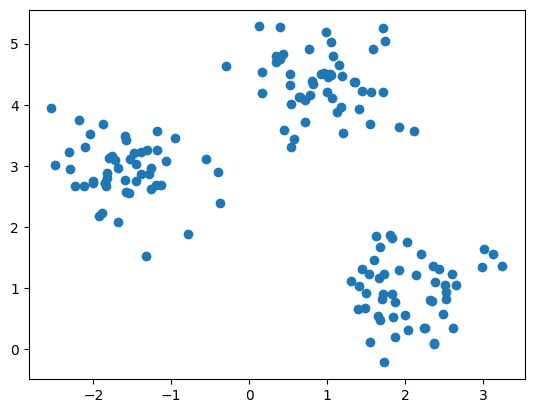

In [128]:
plt.scatter(x[:,0],x[:,1])
plt.show()

### 학습

In [129]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=2022)
km.fit(x)

C:\Users\최가인\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=2022)

In [130]:
y_pred = km.predict(x)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 0, 2, 0, 1, 0,
       1, 1, 2, 0, 0, 1, 2, 0, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0,
       0, 0, 2, 1, 2, 1, 0, 1, 1, 0, 0, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 0, 1, 0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1,
       2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0])

In [131]:
df = pd.DataFrame(x, columns=['X_1','X_2'])
df.head()

,X_1,X_2
0,2.605097,1.225296
1,0.532377,3.313389
2,0.802314,4.381962
3,0.528537,4.497239
4,2.618585,0.357698


In [132]:
df['y_pred'] = y_pred
df

,X_1,X_2,y_pred
0,2.605097,1.225296,0
1,0.532377,3.313389,1
2,0.802314,4.381962,1
3,0.528537,4.497239,1
4,2.618585,0.357698,0
...,...,...,...
145,-2.238934,2.671222,2
146,-1.872929,3.686071,2
147,-1.889703,2.226200,2
148,2.253271,0.351133,0


<AxesSubplot: xlabel='X_1', ylabel='X_2'>

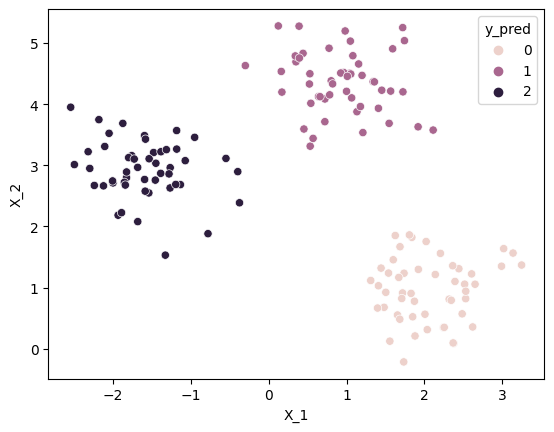

In [133]:
sns.scatterplot(data = df, x='X_1', y='X_2', hue='y_pred')

In [134]:
centroid = km.cluster_centers_ # centrroid

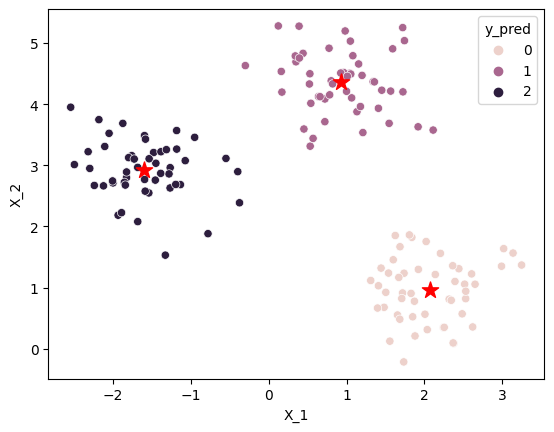

In [135]:
sns.scatterplot(data = df, x='X_1', y='X_2', hue='y_pred')
plt.scatter(centroid[:,0], centroid[:,1],
            s=150, marker='*', c='red')

### elbow method

In [136]:
inertia = []

for k in range(2,11):
    # fit
    # km.inertia_
    # append

    km = KMeans(n_clusters=k, random_state=2022)
    km.fit(x)
    
    inertia.append(km.inertia_)
    
print(inertia)

C:\Users\최가인\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\최가인\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\최가인\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\최가인\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

[283.46101780209307, 72.47601670996698, 62.84061768542222, 54.29757489773777, 47.85292137212694, 39.88978825654857, 35.70304272594484, 30.62447057434606, 26.971098162233982]


C:\Users\최가인\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


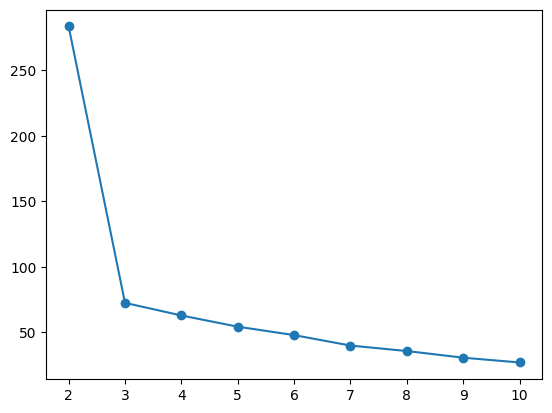

In [137]:
plt.plot(range(2,11), inertia, marker='o')
plt.show()

# iris 데이터를 사용해서 Kmeans
---

# 데이터 읽어오기

In [138]:
from sklearn import datasets

iris = datasets.load_iris() # 데이터를 파일에서 불러오는게 아닌 sklearn에서 불러옴

In [139]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [140]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [141]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [142]:
df = df.drop(['petal length (cm)','petal width (cm)'],axis=1)

In [143]:
inertia = []

km = KMeans(n_clusters=3, random_state=2022)
km.fit(df)
    
inertia.append(km.inertia_)
    
print(inertia)

[37.05070212765957]


C:\Users\최가인\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [144]:
y_pred = km.predict(df)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [145]:
df['y_pred'] = y_pred
df

,sepal length (cm),sepal width (cm),y_pred
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,0
147,6.5,3.0,2
148,6.2,3.4,2


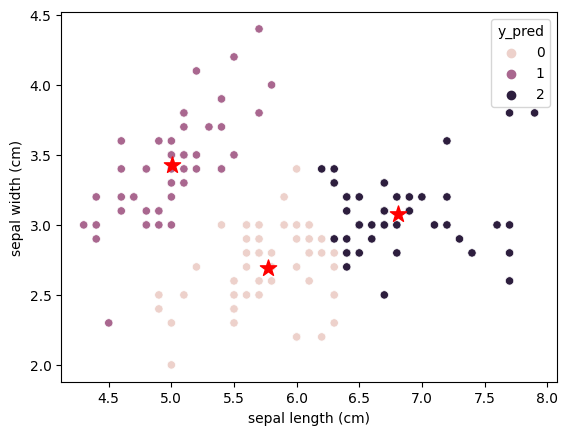

In [146]:
sns.scatterplot(data = df, x = 'sepal length (cm)', y = 'sepal width (cm)', hue = 'y_pred')
centroid = km.cluster_centers_ # centrroid
plt.scatter(centroid[:,0], centroid[:,1],
            s=150, marker='*', c='red')